In [3]:
%pip install fdtd

Note: you may need to restart the kernel to use updated packages.


In [75]:
import fdtd

In [79]:
WAVELENGTH = 1550e-9
SPEED_LIGHT: float = 299_792_458.0  # [m/s] speed of light


grid = fdtd.Grid(
    (2.5e-5, 2.5e-5, 1),
    grid_spacing=0.1 * WAVELENGTH,
    permittivity=1.0,
    permeability=1.0,
)

# boundaries
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")
# grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")
grid[:, :, 0] = fdtd.PeriodicBoundary(name="zbounds")


# sources
grid[60, grid.shape[1]//2, 0] = fdtd.PointSource(
    period=WAVELENGTH / SPEED_LIGHT, name="pointsource1"
)
grid[100, grid.shape[1]//2, 0] = fdtd.PointSource(
    period=WAVELENGTH / SPEED_LIGHT, name="pointsource2",
)

# # detectors
# grid[12e-6, :, 0] = fdtd.LineDetector(name="detector")

# # object
# grid[11:32, 30:84, 0:1] = fdtd.AnisotropicObject(permittivity=2.5, name="object")



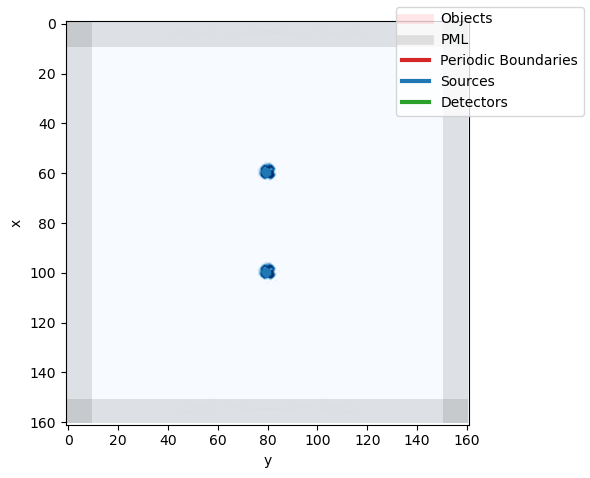

In [83]:
from IPython.display import clear_output
grid.reset()
for i in range(6):
    grid.step()
    grid.visualize(z=0, animate=True)
    clear_output(wait=True) # only necessary in jupyter notebooks

In [88]:
grid.save_simulation("~/Desktop/fdtd_simulation")  # saving simulation to disk
video_path = grid.generate_video(delete_frames=False)  # rendering video from saved frames

ffmpeg version 6.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with clang version 16.0.6
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1699837992312/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1699837992312/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enab

TypeError: CalledProcessError.__init__() missing 1 required positional argument: 'cmd'